# hsum
Simple example illustrating how to use the C++ interpreter




**Author:** Wim Lavrijsen  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:16 AM.</small></i>

In [1]:
from ROOT import TCanvas, TH1F, TSlider
from ROOT import gROOT, gBenchmark, gRandom

Create a new canvas, and customize it.

In [2]:
c1 = TCanvas( 'c1', 'The HSUM example', 200, 10, 600, 400 )
c1.SetGrid();

gBenchmark.Start( 'hsum' )

Create some histograms.

In [3]:
total  = TH1F( 'total', 'This is the total distribution', 100, -4, 4 )
main   = TH1F( 'main', 'Main contributor', 100, -4, 4 )
s1     = TH1F( 's1', 'This is the first signal', 100, -4, 4 )
s2     = TH1F( 's2', 'This is the second signal', 100, -4, 4 )
total.Sumw2()   # this makes sure that the sum of squares of weights will be stored

Set canvas/frame attributes.

In [4]:
total.SetMarkerStyle( 21 )
total.SetMarkerSize( 0.7 )
main.SetFillColor( 16 )
s1.SetFillColor( 42 )
s2.SetFillColor( 46 )

Initialize random number generator.

In [5]:
gRandom.SetSeed()
gauss, landau = gRandom.Gaus, gRandom.Landau

for speed, bind and cache the Fill member functions

In [6]:
histos = [ 'total', 'main', 's1', 's2' ]
for name in histos:
   exec('%sFill = %s.Fill' % (name,name))

Fill histograms randomly

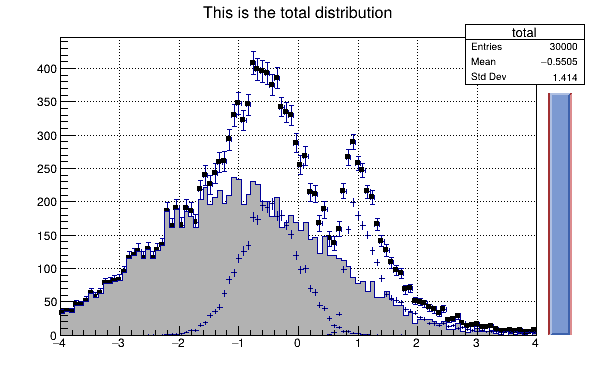

In [7]:
kUPDATE = 500
for i in range( 10000 ):
 # Generate random values.
   xmain = gauss( -1, 1.5 )
   xs1   = gauss( -0.5, 0.5 )
   xs2   = landau( 1, 0.15 )
   mainFill( xmain )

 # Fill histograms.
   s1Fill( xs1, 0.3 )
   s2Fill( xs2, 0.2 )
   totalFill( xmain )
   totalFill( xs1, 0.3 )
   totalFill( xs2, 0.2 )

 # Update display every kUPDATE events.
   if i and (i%kUPDATE) == 0 :
      if i == kUPDATE :
         total.Draw( 'e1p' )
         main.Draw( 'same' )
         s1.Draw( 'same' )
         s2.Draw( 'same' )
         c1.Update()
         slider = TSlider( 'slider', 'test', 4.2, 0, 4.6, total.GetMaximum(), 38 )
         slider.SetFillColor( 46 )

      if slider:
         slider.SetRange( 0, float(i) / 10000. )

      c1.Modified()
      c1.Update()

Destroy member functions cache.

In [8]:
for name in histos:
   exec('del %sFill' % name)
del histos

Done, finalized and trigger an update.

In [9]:
slider.SetRange( 0, 1 )
total.Draw( 'sameaxis' ) # to redraw axis hidden by the fill area
c1.Modified()
c1.Update()

gBenchmark.Show( 'hsum' )

hsum      : Real Time =   1.33 seconds Cpu Time =   0.56 seconds


Draw all canvases 

In [10]:
%jsroot on
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()